### Basic Statistical Concepts

#### Measures of Central Tendency (Mean, Median, Mode)
- Concept: These describe the center of a dataset.

- Mean: Average value.
- Median: Middle value when sorted.
- Mode: Most frequent value

In [2]:
from scipy import stats
import numpy as np

data = [1, 2, 2, 3, 4, 4, 4, 5, 6]
mean_value = np.mean(data)
median_value = np.median(data)
mode_value = stats.mode(data)  # Remove keepdims=True

print(f"Mean: {mean_value}, Median: {median_value}, Mode: {mode_value.mode[0]}")


Mean: 3.4444444444444446, Median: 4.0, Mode: 4


In [3]:
data = [10, 15, 20, 25, 25, 30, 35, 40, 40, 40, 45]
mean_value = np.mean(data)
median_value = np.median(data)
mode_value = stats.mode(data)  # Remove keepdims=True

print(f"Mean: {mean_value}, Median: {median_value}, Mode: {mode_value.mode[0]}")


Mean: 29.545454545454547, Median: 30.0, Mode: 40


#### Measures of Dispersion (Variance & Standard Deviation)
- Concept: These describe how spread out the data is.

- Variance: Average squared deviation from the mean.
- Standard Deviation: Square root of variance.

In [4]:
# Calculate variance & standard deviation
variance = np.var(data, ddof=1)  # Sample variance (ddof=1)
std_dev = np.std(data, ddof=1)

print(f"Variance: {variance:.2f}, Standard Deviation: {std_dev:.2f}")


Variance: 132.27, Standard Deviation: 11.50


#### Normal Distribution (Bell Curve)
-  Concept: Many real-world datasets follow a normal distribution.

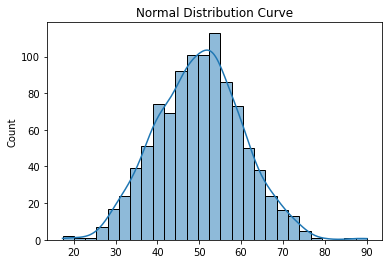

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate normal distribution
data = np.random.normal(loc=50, scale=10, size=1000)  # Mean=50, Std=10

# Plot distribution
sns.histplot(data, kde=True)
plt.title("Normal Distribution Curve")
plt.show()


#### Findings:

- Most values are close to the mean (50).
- The distribution follows a bell curve.

####  Skewness & Kurtosis (Shape of Distribution)
 Concept:

- Skewness: Measures symmetry (left or right skew).
- Kurtosis: Measures whether the distribution has fat tails (high peaks).

In [6]:
from scipy.stats import skew, kurtosis

# Generate skewed data
data = np.random.exponential(scale=2, size=1000)

# Calculate skewness & kurtosis
skewness = skew(data)
kurt = kurtosis(data)

print(f"Skewness: {skewness:.2f}, Kurtosis: {kurt:.2f}")


Skewness: 1.96, Kurtosis: 4.98


###### Findings:

- Skewness > 0: Right-skewed distribution (long right tail).
- Kurtosis > 0: More outliers than a normal distribution.

#### Probability Concepts in Data Science
-  Probability Distributions (Binomial & Poisson)
- (A) Binomial Distribution (Yes/No Outcomes)
-  Example: Tossing a coin 10 times.

In [7]:
from scipy.stats import binom

# Probability of getting exactly 6 heads in 10 coin flips (p=0.5)
prob_6_heads = binom.pmf(k=6, n=10, p=0.5)

print(f"Probability of exactly 6 heads: {prob_6_heads:.4f}")


Probability of exactly 6 heads: 0.2051


#### Poisson Distribution (Event Count in Time)

In [8]:
from scipy.stats import poisson

# Probability of receiving exactly 3 emails in an hour (average=5)
prob_3_emails = poisson.pmf(k=3, mu=5)

print(f"Probability of receiving exactly 3 emails: {prob_3_emails:.4f}")


Probability of receiving exactly 3 emails: 0.1404


##### Central Limit Theorem (CLT)
- Concept: The mean of many random samples follows a normal distribution.

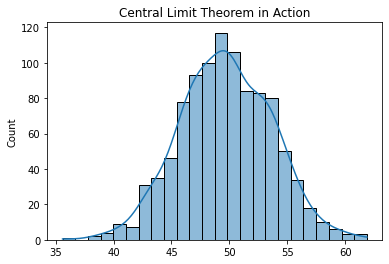

In [9]:
means = [np.mean(np.random.randint(1, 100, 50)) for _ in range(1000)]

sns.histplot(means, kde=True)
plt.title("Central Limit Theorem in Action")
plt.show()


- Findings: Even if individual samples are not normal, their means follow a normal distribution.

### Hypothesis Testing in Data Science
-  Z-Test & T-Test (Comparing Means)

In [10]:
from statsmodels.stats.weightstats import ztest

# Generate two groups
group1 = np.random.normal(60, 10, 500)
group2 = np.random.normal(65, 10, 500)

# Perform z-test
z_stat, p_value = ztest(group1, group2)
print(f"Z-Test: z-stat={z_stat:.2f}, p-value={p_value:.4f}")


Z-Test: z-stat=-6.71, p-value=0.0000


- Interpretation: If p-value < 0.05, the two groups are significantly different.

#### T-Test (Small Sample Size)

In [11]:
t_stat, p_value = stats.ttest_ind(group1[:30], group2[:30])
print(f"T-Test: t-stat={t_stat:.2f}, p-value={p_value:.4f}")


T-Test: t-stat=-1.03, p-value=0.3070


-  Findings: Similar to Z-test but used when sample size is small (< 30).

#### Chi-Square Test (Categorical Variables)
- Example: Checking if Survival on Titanic is dependent on Gender

In [13]:
import pandas as pd
df = pd.read_csv("train.csv")

# Create contingency table
contingency = pd.crosstab(df["Sex"], df["Survived"])

# Perform Chi-Square Test
chi2, p, _, _ = stats.chi2_contingency(contingency)

print(f"Chi-Square Test: chi2={chi2:.2f}, p-value={p:.4f}")


Chi-Square Test: chi2=260.72, p-value=0.0000


- If p < 0.05, survival depends on gender.

#### ANOVA Test (Comparing 3+ Groups)
-  Checking if Titanic survival rates differ by Passenger Class (1st, 2nd, 3rd).

In [14]:
# Survival rate by class
pclass_groups = [df[df["Pclass"] == i]["Survived"] for i in df["Pclass"].unique()]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*pclass_groups)
print(f"ANOVA Test: F-stat={f_stat:.2f}, p-value={p_value:.4f}")


ANOVA Test: F-stat=57.96, p-value=0.0000


- If p < 0.05, survival rates significantly differ between passenger classes.

### Correlation & Regression
Correlation (Strength of Relationship)

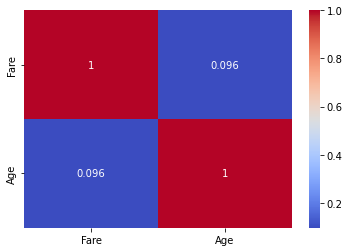

In [15]:
# Compute correlation
correlation = df[["Fare", "Age"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()


#### Linear Regression (Predicting Continuous Values)

In [16]:
import statsmodels.api as sm

# Define dependent & independent variables
X = df[["Age", "Fare"]].dropna()
y = df.loc[X.index, "Survived"]

# Fit regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     32.02
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           4.84e-14
Time:                        21:07:28   Log-Likelihood:                -474.62
No. Observations:                 714   AIC:                             955.2
Df Residuals:                     711   BIC:                             969.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4210      0.041     10.270      0.0

- Findings: Age & Fare affect survival probability.

### Final Summary & Next Steps
- Basic Stats: Mean, Variance, Skewness.
 - Probability: Normal, Binomial, Poisson Distributions.
 - Hypothesis Testing: Z-Test, T-Test, ANOVA, Chi-Square.
 - Regression & Correlation: Predictive Modeling.

In [17]:
# Load dataset
df = pd.read_csv("train.csv")

# Display first few rows
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


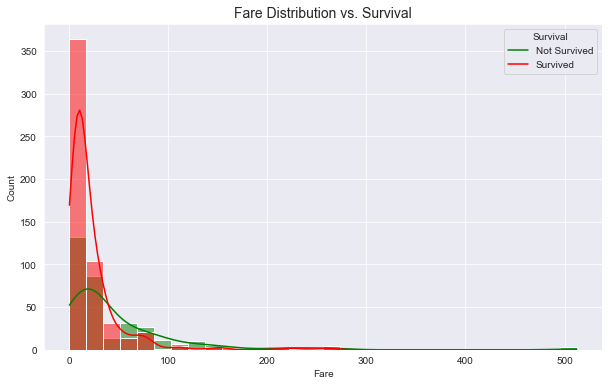

In [18]:
# Set style for better visualization
sns.set_style("darkgrid")

# Plot histogram for Fare distribution by Survival
plt.figure(figsize=(10, 6))
sns.histplot(df, x="Fare", hue="Survived", kde=True, bins=30, palette={0: "red", 1: "green"})

# Add title & labels
plt.title("Fare Distribution vs. Survival", fontsize=14)
plt.xlabel("Fare")
plt.ylabel("Count")
plt.legend(title="Survival", labels=["Not Survived", "Survived"])
plt.show()


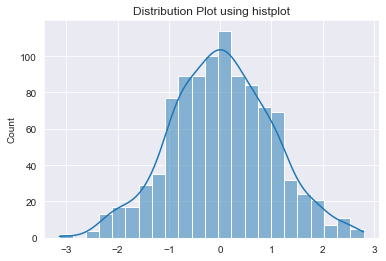

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
data = np.random.randn(1000)  # 1000 random values from a normal distribution

# Plot distribution
sns.histplot(data, kde=True)  # kde=True adds the kernel density estimate
plt.title("Distribution Plot using histplot")
plt.show()


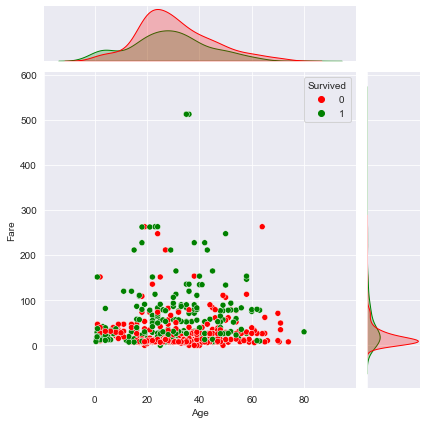

In [20]:
# Create a jointplot to analyze correlation between Age & Fare
sns.jointplot(data=df, x="Age", y="Fare", hue="Survived", kind="scatter", palette={0: "red", 1: "green"})

plt.show()


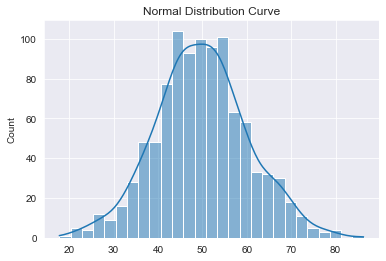

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate normal distribution
data = np.random.normal(loc=50, scale=10, size=1000)

# Plot distribution
sns.histplot(data, kde=True)
plt.title("Normal Distribution Curve")
plt.show()


In [22]:
from scipy.stats import binom

# Probability of getting exactly 6 heads in 10 flips (p=0.5)
prob_6_heads = binom.pmf(k=6, n=10, p=0.5)

print(f"Probability of exactly 6 heads: {prob_6_heads:.4f}")


Probability of exactly 6 heads: 0.2051


In [23]:
from scipy.stats import poisson

# Probability of receiving exactly 3 emails in an hour (average=5)
prob_3_emails = poisson.pmf(k=3, mu=5)

print(f"Probability of exactly 3 emails: {prob_3_emails:.4f}")


Probability of exactly 3 emails: 0.1404


In [24]:
from statsmodels.stats.weightstats import ztest

# Generate two groups
group1 = np.random.normal(60, 10, 500)
group2 = np.random.normal(65, 10, 500)

# Perform z-test
z_stat, p_value = ztest(group1, group2)
print(f"Z-Test: z-stat={z_stat:.2f}, p-value={p_value:.4f}")


Z-Test: z-stat=-6.81, p-value=0.0000


In [25]:
t_stat, p_value = stats.ttest_ind(group1[:30], group2[:30])
print(f"T-Test: t-stat={t_stat:.2f}, p-value={p_value:.4f}")


T-Test: t-stat=-2.30, p-value=0.0254


In [26]:
df = pd.read_csv("train.csv")

# Create contingency table
contingency = pd.crosstab(df["Sex"], df["Survived"])

# Perform Chi-Square Test
chi2, p, _, _ = stats.chi2_contingency(contingency)

print(f"Chi-Square Test: chi2={chi2:.2f}, p-value={p:.4f}")


Chi-Square Test: chi2=260.72, p-value=0.0000


In [27]:
# Survival rate by class
pclass_groups = [df[df["Pclass"] == i]["Survived"] for i in df["Pclass"].unique()]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*pclass_groups)
print(f"ANOVA Test: F-stat={f_stat:.2f}, p-value={p_value:.4f}")


ANOVA Test: F-stat=57.96, p-value=0.0000


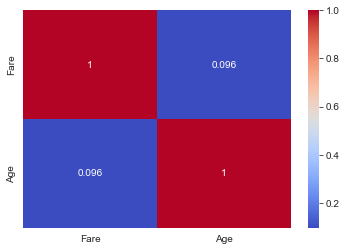

In [28]:
# Compute correlation
correlation = df[["Fare", "Age"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()


In [29]:
import statsmodels.api as sm

# Define dependent & independent variables
X = df[["Age", "Fare"]].dropna()
y = df.loc[X.index, "Survived"]

# Fit regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     32.02
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           4.84e-14
Time:                        21:13:25   Log-Likelihood:                -474.62
No. Observations:                 714   AIC:                             955.2
Df Residuals:                     711   BIC:                             969.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4210      0.041     10.270      0.0

- Basic Stats: Mean, Variance, Skewness.
- Probability: Normal, Binomial, Poisson Distributions.
- Hypothesis Testing: Z-Test, T-Test, ANOVA, Chi-Square.
- Regression & Correlation: Predictive Modeling.

- https://seaborn.pydata.org/tutorial/function_overview.html

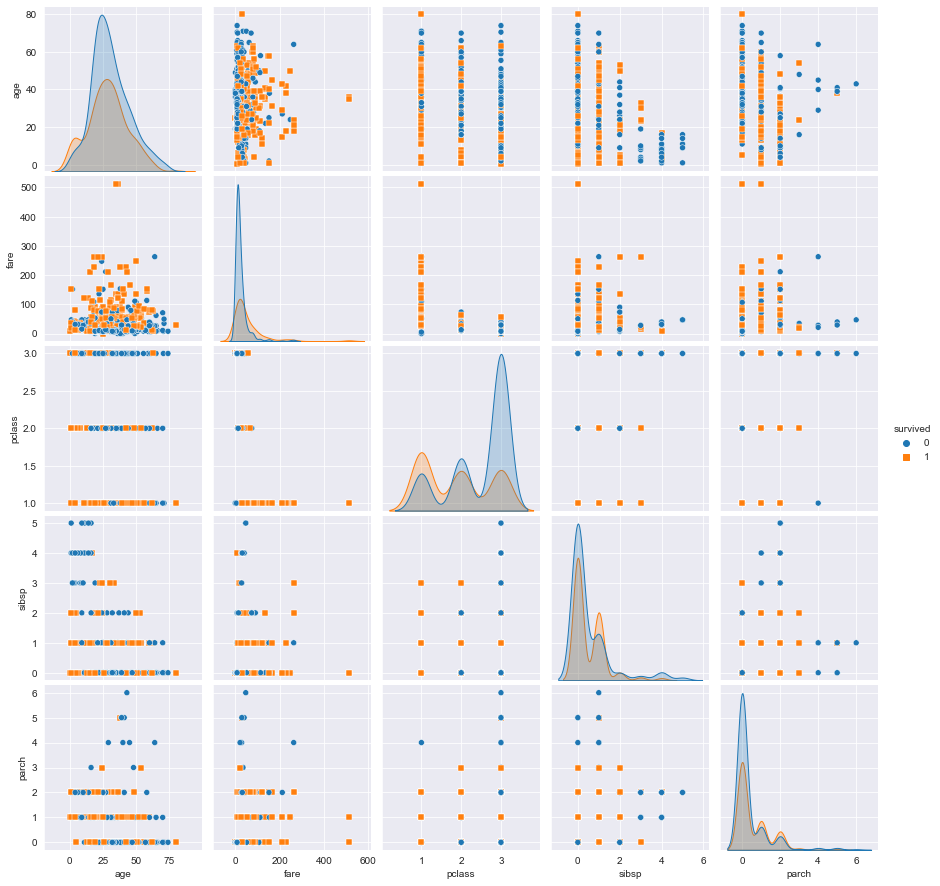

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Select numerical columns
num_cols = ["age", "fare", "pclass", "sibsp", "parch"]

# Drop rows with missing values (optional)
df = df[num_cols + ["survived"]].dropna()

# Create a pairplot
sns.pairplot(df, hue="survived", diag_kind="kde", markers=["o", "s"])

# Show plot
plt.show()


#### Explanation
- Numerical Columns: We selected age, fare, pclass, sibsp, and parch (since pairplot works with numerical data).
- hue="survived": Colors the points based on survival (0 = Not survived, 1 = Survived).
- diag_kind="kde": Uses KDE plots instead of histograms for the diagonal.
- markers=["o", "s"]: Uses different markers for different survival categories.

In [33]:
df.columns

Index(['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived'], dtype='object')

In [34]:
# Calculate mean, variance, and skewness for 'Age'
print("Mean Age:", df["age"].mean())
print("Variance of Age:", df["age"].var())
print("Skewness of Age:", df["age"].skew())

Mean Age: 29.69911764705882
Variance of Age: 211.0191247463081
Skewness of Age: 0.38910778230082693


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["Age_Scaled"] = scaler.fit_transform(df[["age"]])


In [36]:
from scipy.stats import binom

# Probability of survival in 10 passengers if survival rate is 0.38
prob = binom.pmf(k=5, n=10, p=0.38)
print(f"Probability of 5 survivors in 10 passengers: {prob:.4f}")


Probability of 5 survivors in 10 passengers: 0.1829


In [38]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df["pclass"], df["survived"])

# Perform Chi-Square Test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test p-value: {p:.4f}")


Chi-Square Test p-value: 0.0000


In [39]:
from scipy.stats import ttest_ind

# Survival groups
survived = df[df["survived"] == 1]["fare"]
not_survived = df[df["survived"] == 0]["fare"]

# Perform T-test
t_stat, p_value = ttest_ind(survived, not_survived)
print(f"T-Test p-value: {p_value:.4f}")


T-Test p-value: 0.0000


In [40]:
df = pd.read_csv('train.csv')

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select features based on hypothesis testing & correlation
features = ["Pclass", "Sex", "Age", "Fare"]
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})  # Encode categorical feature

# Prepare data
X = df[features].dropna()
y = df.loc[X.index, "Survived"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions & Accuracy
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.7412587412587412
